In [1]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [5]:

anc_1 = os.path.join(ANC_PATH,'01')
anc_2 = os.path.join(ANC_PATH,'02')
anc_3 = os.path.join(ANC_PATH,'03')
anc_4 = os.path.join(ANC_PATH,'04')
anc_5 = os.path.join(ANC_PATH,'05')
anc_6 = os.path.join(ANC_PATH,'06')
anc_7 = os.path.join(ANC_PATH,'07')
anc_8 = os.path.join(ANC_PATH,'08')
anc_9 = os.path.join(ANC_PATH,'09')
anc_10 = os.path.join(ANC_PATH,'10')
anc_11 = os.path.join(ANC_PATH,'11')
anc_12 = os.path.join(ANC_PATH,'12')
anc_13 = os.path.join(ANC_PATH,'13')
anc_14 = os.path.join(ANC_PATH,'14')
anc_15 = os.path.join(ANC_PATH,'15')
anc_16 = os.path.join(ANC_PATH,'16')
anc_17 = os.path.join(ANC_PATH,'17')
anc_18 = os.path.join(ANC_PATH,'18')
anc_19 = os.path.join(ANC_PATH,'19')

In [6]:

anc_1_im=tf.data.Dataset.list_files(anc_1+'\*.jpg').take(10)
anc_2_im=tf.data.Dataset.list_files(anc_2+'\*.jpg').take(10)
anc_3_im=tf.data.Dataset.list_files(anc_3+'\*.jpg').take(10)
anc_4_im=tf.data.Dataset.list_files(anc_4+'\*.jpg').take(10)
anc_5_im=tf.data.Dataset.list_files(anc_5+'\*.jpg').take(10)
anc_6_im=tf.data.Dataset.list_files(anc_6+'\*.jpg').take(10)
anc_7_im=tf.data.Dataset.list_files(anc_7+'\*.jpg').take(10)
anc_8_im=tf.data.Dataset.list_files(anc_8+'\*.jpg').take(10)
anc_9_im=tf.data.Dataset.list_files(anc_9+'\*.jpg').take(10)
anc_10_im=tf.data.Dataset.list_files(anc_10+'\*.jpg').take(10)
anc_11_im=tf.data.Dataset.list_files(anc_11+'\*.jpg').take(10)
anc_12_im=tf.data.Dataset.list_files(anc_12+'\*.jpg').take(10)
anc_13_im=tf.data.Dataset.list_files(anc_13+'\*.jpg').take(10)
anc_14_im=tf.data.Dataset.list_files(anc_14+'\*.jpg').take(10)
anc_15_im=tf.data.Dataset.list_files(anc_15+'\*.jpg').take(10)
anc_16_im=tf.data.Dataset.list_files(anc_16+'\*.jpg').take(10)
anc_17_im=tf.data.Dataset.list_files(anc_17+'\*.jpg').take(10)
anc_18_im=tf.data.Dataset.list_files(anc_18+'\*.jpg').take(10)
anc_19_im=tf.data.Dataset.list_files(anc_19+'\*.jpg').take(10)

In [7]:
neg_1 = os.path.join(NEG_PATH,'01')
neg_2 = os.path.join(NEG_PATH,'02')
neg_3 = os.path.join(NEG_PATH,'03')
neg_4 = os.path.join(NEG_PATH,'04')
neg_5 = os.path.join(NEG_PATH,'05')
neg_6 = os.path.join(NEG_PATH,'06')
neg_7 = os.path.join(NEG_PATH,'07')
neg_8 = os.path.join(NEG_PATH,'08')
neg_9 = os.path.join(NEG_PATH,'09')
neg_10 = os.path.join(NEG_PATH,'10')
neg_11 = os.path.join(NEG_PATH,'11')
neg_12 = os.path.join(NEG_PATH,'12')
neg_13 = os.path.join(NEG_PATH,'13')
neg_14 = os.path.join(NEG_PATH,'14')
neg_15 = os.path.join(NEG_PATH,'15')
neg_16 = os.path.join(NEG_PATH,'16')
neg_17 = os.path.join(NEG_PATH,'17')
neg_18 = os.path.join(NEG_PATH,'18')
neg_19 = os.path.join(NEG_PATH,'19')

In [8]:
neg_1_im=tf.data.Dataset.list_files(neg_1+'\*.jpg').take(10)
neg_2_im=tf.data.Dataset.list_files(neg_2+'\*.jpg').take(10)
neg_3_im=tf.data.Dataset.list_files(neg_3+'\*.jpg').take(10)
neg_4_im=tf.data.Dataset.list_files(neg_4+'\*.jpg').take(10)
neg_5_im=tf.data.Dataset.list_files(neg_5+'\*.jpg').take(10)
neg_6_im=tf.data.Dataset.list_files(neg_6+'\*.jpg').take(10)
neg_7_im=tf.data.Dataset.list_files(neg_7+'\*.jpg').take(10)
neg_8_im=tf.data.Dataset.list_files(neg_8+'\*.jpg').take(10)
neg_9_im=tf.data.Dataset.list_files(neg_9+'\*.jpg').take(10)
neg_10_im=tf.data.Dataset.list_files(neg_10+'\*.jpg').take(10)
neg_11_im=tf.data.Dataset.list_files(neg_11+'\*.jpg').take(10)
neg_12_im=tf.data.Dataset.list_files(neg_12+'\*.jpg').take(10)
neg_13_im=tf.data.Dataset.list_files(neg_13+'\*.jpg').take(10)
neg_14_im=tf.data.Dataset.list_files(neg_14+'\*.jpg').take(10)
neg_15_im=tf.data.Dataset.list_files(neg_15+'\*.jpg').take(10)
neg_16_im=tf.data.Dataset.list_files(neg_16+'\*.jpg').take(10)
neg_17_im=tf.data.Dataset.list_files(neg_17+'\*.jpg').take(10)
neg_18_im=tf.data.Dataset.list_files(neg_18+'\*.jpg').take(10)
neg_19_im=tf.data.Dataset.list_files(neg_19+'\*.jpg').take(10)

In [9]:
pos_1_0 = os.path.join(POS_PATH,'01')
pos_1_1 = os.path.join(POS_PATH,'01_1')
pos_1_2 = os.path.join(POS_PATH,'01_2')
pos_1_3 = os.path.join(POS_PATH,'01_3')
pos_1_4 = os.path.join(POS_PATH,'01_4')
pos_1_5 = os.path.join(POS_PATH,'01_5')
pos_1_6 = os.path.join(POS_PATH,'01_6')
pos_1_7 = os.path.join(POS_PATH,'01_7')
pos_1_8 = os.path.join(POS_PATH,'01_8')
pos_1_9 = os.path.join(POS_PATH,'01_9')
pos_1_10 = os.path.join(POS_PATH,'01_10')
pos_1_11 = os.path.join(POS_PATH,'01_11')
pos_1_12 = os.path.join(POS_PATH,'01_12')
pos_1_13 = os.path.join(POS_PATH,'01_13')
pos_1_14 = os.path.join(POS_PATH,'01_14')
pos_1_15 = os.path.join(POS_PATH,'01_15')
pos_1_16 = os.path.join(POS_PATH,'01_16')

In [10]:
pos_1_0_im=tf.data.Dataset.list_files(pos_1_0+'\*.jpg').take(10)
pos_1_1_im=tf.data.Dataset.list_files(pos_1_1+'\*.jpg').take(10)
pos_1_2_im=tf.data.Dataset.list_files(pos_1_2+'\*.jpg').take(10)
pos_1_3_im=tf.data.Dataset.list_files(pos_1_3+'\*.jpg').take(10)
pos_1_4_im=tf.data.Dataset.list_files(pos_1_4+'\*.jpg').take(10)
pos_1_5_im=tf.data.Dataset.list_files(pos_1_5+'\*.jpg').take(10)
pos_1_6_im=tf.data.Dataset.list_files(pos_1_6+'\*.jpg').take(10)
pos_1_7_im=tf.data.Dataset.list_files(pos_1_7+'\*.jpg').take(10)
pos_1_8_im=tf.data.Dataset.list_files(pos_1_8+'\*.jpg').take(10)
pos_1_9_im=tf.data.Dataset.list_files(pos_1_9+'\*.jpg').take(10)
pos_1_10_im=tf.data.Dataset.list_files(pos_1_10+'\*.jpg').take(10)
pos_1_11_im=tf.data.Dataset.list_files(pos_1_11+'\*.jpg').take(10)
pos_1_12_im=tf.data.Dataset.list_files(pos_1_12+'\*.jpg').take(10)
pos_1_13_im=tf.data.Dataset.list_files(pos_1_13+'\*.jpg').take(10)
pos_1_14_im=tf.data.Dataset.list_files(pos_1_14+'\*.jpg').take(10)
pos_1_15_im=tf.data.Dataset.list_files(pos_1_15+'\*.jpg').take(10)
pos_1_16_im=tf.data.Dataset.list_files(pos_1_16+'\*.jpg').take(10)


In [11]:
#2
pos_2_0 = os.path.join(POS_PATH,'02')
pos_2_1 = os.path.join(POS_PATH,'02_1')
pos_2_2 = os.path.join(POS_PATH,'02_2')
pos_2_3 = os.path.join(POS_PATH,'02_3')
pos_2_4 = os.path.join(POS_PATH,'02_4')
pos_2_5 = os.path.join(POS_PATH,'02_5')
pos_2_6 = os.path.join(POS_PATH,'02_6')
pos_2_7 = os.path.join(POS_PATH,'02_7')
pos_2_8 = os.path.join(POS_PATH,'02_8')
pos_2_9 = os.path.join(POS_PATH,'02_9')
pos_2_10 = os.path.join(POS_PATH,'02_10')
pos_2_11 = os.path.join(POS_PATH,'02_11')
pos_2_12 = os.path.join(POS_PATH,'02_12')
pos_2_13 = os.path.join(POS_PATH,'02_13')
pos_2_14 = os.path.join(POS_PATH,'02_14')
pos_2_15 = os.path.join(POS_PATH,'02_15')
pos_2_16 = os.path.join(POS_PATH,'02_16')

In [12]:
pos_2_0_im=tf.data.Dataset.list_files(pos_2_0+'\*.jpg').take(10)
pos_2_1_im=tf.data.Dataset.list_files(pos_2_1+'\*.jpg').take(10)
pos_2_2_im=tf.data.Dataset.list_files(pos_2_2+'\*.jpg').take(10)
pos_2_3_im=tf.data.Dataset.list_files(pos_2_3+'\*.jpg').take(10)
pos_2_4_im=tf.data.Dataset.list_files(pos_2_4+'\*.jpg').take(10)
pos_2_5_im=tf.data.Dataset.list_files(pos_2_5+'\*.jpg').take(10)
pos_2_6_im=tf.data.Dataset.list_files(pos_2_6+'\*.jpg').take(10)
pos_2_7_im=tf.data.Dataset.list_files(pos_2_7+'\*.jpg').take(10)
pos_2_8_im=tf.data.Dataset.list_files(pos_2_8+'\*.jpg').take(10)
pos_2_9_im=tf.data.Dataset.list_files(pos_2_9+'\*.jpg').take(10)
pos_2_10_im=tf.data.Dataset.list_files(pos_2_10+'\*.jpg').take(10)
pos_2_11_im=tf.data.Dataset.list_files(pos_2_11+'\*.jpg').take(10)
pos_2_12_im=tf.data.Dataset.list_files(pos_2_12+'\*.jpg').take(10)
pos_2_13_im=tf.data.Dataset.list_files(pos_2_13+'\*.jpg').take(10)
pos_2_14_im=tf.data.Dataset.list_files(pos_2_14+'\*.jpg').take(10)
pos_2_15_im=tf.data.Dataset.list_files(pos_2_15+'\*.jpg').take(10)
pos_2_16_im=tf.data.Dataset.list_files(pos_2_16+'\*.jpg').take(10)


In [13]:
#3
pos_3_0 = os.path.join(POS_PATH,'03')
pos_3_1 = os.path.join(POS_PATH,'03_1')
pos_3_2 = os.path.join(POS_PATH,'03_2')
pos_3_3 = os.path.join(POS_PATH,'03_3')
pos_3_4 = os.path.join(POS_PATH,'03_4')
pos_3_5 = os.path.join(POS_PATH,'03_5')
pos_3_6 = os.path.join(POS_PATH,'03_6')
pos_3_7 = os.path.join(POS_PATH,'03_7')
pos_3_8 = os.path.join(POS_PATH,'03_8')
pos_3_9 = os.path.join(POS_PATH,'03_9')
pos_3_10 = os.path.join(POS_PATH,'03_10')
pos_3_11 = os.path.join(POS_PATH,'03_11')
pos_3_12 = os.path.join(POS_PATH,'03_12')
pos_3_13 = os.path.join(POS_PATH,'03_13')
pos_3_14 = os.path.join(POS_PATH,'03_14')
pos_3_15 = os.path.join(POS_PATH,'03_15')
pos_3_16 = os.path.join(POS_PATH,'03_16')

In [14]:
pos_3_0_im=tf.data.Dataset.list_files(pos_3_0+'\*.jpg').take(10)
pos_3_1_im=tf.data.Dataset.list_files(pos_3_1+'\*.jpg').take(10)
pos_3_2_im=tf.data.Dataset.list_files(pos_3_2+'\*.jpg').take(10)
pos_3_3_im=tf.data.Dataset.list_files(pos_3_3+'\*.jpg').take(10)
pos_3_4_im=tf.data.Dataset.list_files(pos_3_4+'\*.jpg').take(10)
pos_3_5_im=tf.data.Dataset.list_files(pos_3_5+'\*.jpg').take(10)
pos_3_6_im=tf.data.Dataset.list_files(pos_3_6+'\*.jpg').take(10)
pos_3_7_im=tf.data.Dataset.list_files(pos_3_7+'\*.jpg').take(10)
pos_3_8_im=tf.data.Dataset.list_files(pos_3_8+'\*.jpg').take(10)
pos_3_9_im=tf.data.Dataset.list_files(pos_3_9+'\*.jpg').take(10)
pos_3_10_im=tf.data.Dataset.list_files(pos_3_10+'\*.jpg').take(10)
pos_3_11_im=tf.data.Dataset.list_files(pos_3_11+'\*.jpg').take(10)
pos_3_12_im=tf.data.Dataset.list_files(pos_3_12+'\*.jpg').take(10)
pos_3_13_im=tf.data.Dataset.list_files(pos_3_13+'\*.jpg').take(10)
pos_3_14_im=tf.data.Dataset.list_files(pos_3_14+'\*.jpg').take(10)
pos_3_15_im=tf.data.Dataset.list_files(pos_3_15+'\*.jpg').take(10)
pos_3_16_im=tf.data.Dataset.list_files(pos_3_16+'\*.jpg').take(10)

In [15]:
#4
pos_4_0 = os.path.join(POS_PATH,'04')
pos_4_1 = os.path.join(POS_PATH,'04_1')
pos_4_2 = os.path.join(POS_PATH,'04_2')
pos_4_3 = os.path.join(POS_PATH,'04_3')
pos_4_4 = os.path.join(POS_PATH,'04_4')
pos_4_5 = os.path.join(POS_PATH,'04_5')
pos_4_6 = os.path.join(POS_PATH,'04_6')
pos_4_7 = os.path.join(POS_PATH,'04_7')
pos_4_8 = os.path.join(POS_PATH,'04_8')
pos_4_9 = os.path.join(POS_PATH,'04_9')
pos_4_10 = os.path.join(POS_PATH,'04_10')
pos_4_11 = os.path.join(POS_PATH,'04_11')
pos_4_12 = os.path.join(POS_PATH,'04_12')
pos_4_13 = os.path.join(POS_PATH,'04_13')
pos_4_14 = os.path.join(POS_PATH,'04_14')
pos_4_15 = os.path.join(POS_PATH,'04_15')
pos_4_16 = os.path.join(POS_PATH,'04_16')

In [16]:
pos_4_0_im=tf.data.Dataset.list_files(pos_4_0+'\*.jpg').take(10)
pos_4_1_im=tf.data.Dataset.list_files(pos_4_1+'\*.jpg').take(10)
pos_4_2_im=tf.data.Dataset.list_files(pos_4_2+'\*.jpg').take(10)
pos_4_3_im=tf.data.Dataset.list_files(pos_4_3+'\*.jpg').take(10)
pos_4_4_im=tf.data.Dataset.list_files(pos_4_4+'\*.jpg').take(10)
pos_4_5_im=tf.data.Dataset.list_files(pos_4_5+'\*.jpg').take(10)
pos_4_6_im=tf.data.Dataset.list_files(pos_4_6+'\*.jpg').take(10)
pos_4_7_im=tf.data.Dataset.list_files(pos_4_7+'\*.jpg').take(10)
pos_4_8_im=tf.data.Dataset.list_files(pos_4_8+'\*.jpg').take(10)
pos_4_9_im=tf.data.Dataset.list_files(pos_4_9+'\*.jpg').take(10)
pos_4_10_im=tf.data.Dataset.list_files(pos_4_10+'\*.jpg').take(10)
pos_4_11_im=tf.data.Dataset.list_files(pos_4_11+'\*.jpg').take(10)
pos_4_12_im=tf.data.Dataset.list_files(pos_4_12+'\*.jpg').take(10)
pos_4_13_im=tf.data.Dataset.list_files(pos_4_13+'\*.jpg').take(10)
pos_4_14_im=tf.data.Dataset.list_files(pos_4_14+'\*.jpg').take(10)
pos_4_15_im=tf.data.Dataset.list_files(pos_4_15+'\*.jpg').take(10)
pos_4_16_im=tf.data.Dataset.list_files(pos_4_16+'\*.jpg').take(10)

In [17]:
#5
pos_5_0 = os.path.join(POS_PATH,'05')
pos_5_1 = os.path.join(POS_PATH,'05_1')
pos_5_2 = os.path.join(POS_PATH,'05_2')
pos_5_3 = os.path.join(POS_PATH,'05_3')
pos_5_4 = os.path.join(POS_PATH,'05_4')
pos_5_5 = os.path.join(POS_PATH,'05_5')
pos_5_6 = os.path.join(POS_PATH,'05_6')
pos_5_7 = os.path.join(POS_PATH,'05_7')
pos_5_8 = os.path.join(POS_PATH,'05_8')
pos_5_9 = os.path.join(POS_PATH,'05_9')
pos_5_10 = os.path.join(POS_PATH,'05_10')
pos_5_11 = os.path.join(POS_PATH,'05_11')
pos_5_12 = os.path.join(POS_PATH,'05_12')
pos_5_13 = os.path.join(POS_PATH,'05_13')
pos_5_14 = os.path.join(POS_PATH,'05_14')
pos_5_15 = os.path.join(POS_PATH,'05_15')
pos_5_16 = os.path.join(POS_PATH,'05_16')

In [18]:
pos_5_0_im=tf.data.Dataset.list_files(pos_5_0+'\*.jpg').take(10)
pos_5_1_im=tf.data.Dataset.list_files(pos_5_1+'\*.jpg').take(10)
pos_5_2_im=tf.data.Dataset.list_files(pos_5_2+'\*.jpg').take(10)
pos_5_3_im=tf.data.Dataset.list_files(pos_5_3+'\*.jpg').take(10)
pos_5_4_im=tf.data.Dataset.list_files(pos_5_4+'\*.jpg').take(10)
pos_5_5_im=tf.data.Dataset.list_files(pos_5_5+'\*.jpg').take(10)
pos_5_6_im=tf.data.Dataset.list_files(pos_5_6+'\*.jpg').take(10)
pos_5_7_im=tf.data.Dataset.list_files(pos_5_7+'\*.jpg').take(10)
pos_5_8_im=tf.data.Dataset.list_files(pos_5_8+'\*.jpg').take(10)
pos_5_9_im=tf.data.Dataset.list_files(pos_5_9+'\*.jpg').take(10)
pos_5_10_im=tf.data.Dataset.list_files(pos_5_10+'\*.jpg').take(10)
pos_5_11_im=tf.data.Dataset.list_files(pos_5_11+'\*.jpg').take(10)
pos_5_12_im=tf.data.Dataset.list_files(pos_5_12+'\*.jpg').take(10)
pos_5_13_im=tf.data.Dataset.list_files(pos_5_13+'\*.jpg').take(10)
pos_5_14_im=tf.data.Dataset.list_files(pos_5_14+'\*.jpg').take(10)
pos_5_15_im=tf.data.Dataset.list_files(pos_5_15+'\*.jpg').take(10)
pos_5_16_im=tf.data.Dataset.list_files(pos_5_16+'\*.jpg').take(10)

In [19]:
#6
pos_6_0 = os.path.join(POS_PATH,'06')
pos_6_1 = os.path.join(POS_PATH,'06_1')
pos_6_2 = os.path.join(POS_PATH,'06_2')
pos_6_3 = os.path.join(POS_PATH,'06_3')
pos_6_4 = os.path.join(POS_PATH,'06_4')
pos_6_5 = os.path.join(POS_PATH,'06_5')
pos_6_6 = os.path.join(POS_PATH,'06_6')
pos_6_7 = os.path.join(POS_PATH,'06_7')
pos_6_8 = os.path.join(POS_PATH,'06_8')
pos_6_9 = os.path.join(POS_PATH,'06_9')
pos_6_10 = os.path.join(POS_PATH,'06_10')
pos_6_11 = os.path.join(POS_PATH,'06_11')
pos_6_12 = os.path.join(POS_PATH,'06_12')
pos_6_13 = os.path.join(POS_PATH,'06_13')
pos_6_14 = os.path.join(POS_PATH,'06_14')
pos_6_15 = os.path.join(POS_PATH,'06_15')
pos_6_16 = os.path.join(POS_PATH,'06_16')

In [20]:
pos_6_0_im=tf.data.Dataset.list_files(pos_6_0+'\*.jpg').take(10)
pos_6_1_im=tf.data.Dataset.list_files(pos_6_1+'\*.jpg').take(10)
pos_6_2_im=tf.data.Dataset.list_files(pos_6_2+'\*.jpg').take(10)
pos_6_3_im=tf.data.Dataset.list_files(pos_6_3+'\*.jpg').take(10)
pos_6_4_im=tf.data.Dataset.list_files(pos_6_4+'\*.jpg').take(10)
pos_6_5_im=tf.data.Dataset.list_files(pos_6_5+'\*.jpg').take(10)
pos_6_6_im=tf.data.Dataset.list_files(pos_6_6+'\*.jpg').take(10)
pos_6_7_im=tf.data.Dataset.list_files(pos_6_7+'\*.jpg').take(10)
pos_6_8_im=tf.data.Dataset.list_files(pos_6_8+'\*.jpg').take(10)
pos_6_9_im=tf.data.Dataset.list_files(pos_6_9+'\*.jpg').take(10)
pos_6_10_im=tf.data.Dataset.list_files(pos_6_10+'\*.jpg').take(10)
pos_6_11_im=tf.data.Dataset.list_files(pos_6_11+'\*.jpg').take(10)
pos_6_12_im=tf.data.Dataset.list_files(pos_6_12+'\*.jpg').take(10)
pos_6_13_im=tf.data.Dataset.list_files(pos_6_13+'\*.jpg').take(10)
pos_6_14_im=tf.data.Dataset.list_files(pos_6_14+'\*.jpg').take(10)
pos_6_15_im=tf.data.Dataset.list_files(pos_6_15+'\*.jpg').take(10)
pos_6_16_im=tf.data.Dataset.list_files(pos_6_16+'\*.jpg').take(10)

In [21]:
#7
pos_7_0 = os.path.join(POS_PATH,'07')
pos_7_1 = os.path.join(POS_PATH,'07_1')
pos_7_2 = os.path.join(POS_PATH,'07_2')
pos_7_3 = os.path.join(POS_PATH,'07_3')
pos_7_4 = os.path.join(POS_PATH,'07_4')
pos_7_5 = os.path.join(POS_PATH,'07_5')
pos_7_6 = os.path.join(POS_PATH,'07_6')
pos_7_7 = os.path.join(POS_PATH,'07_7')
pos_7_8 = os.path.join(POS_PATH,'07_8')
pos_7_9 = os.path.join(POS_PATH,'07_9')
pos_7_10 = os.path.join(POS_PATH,'07_10')
pos_7_11 = os.path.join(POS_PATH,'07_11')
pos_7_12 = os.path.join(POS_PATH,'07_12')
pos_7_13 = os.path.join(POS_PATH,'07_13')
pos_7_14 = os.path.join(POS_PATH,'07_14')
pos_7_15 = os.path.join(POS_PATH,'07_15')
pos_7_16 = os.path.join(POS_PATH,'07_16')

In [22]:
pos_7_0_im=tf.data.Dataset.list_files(pos_7_0+'\*.jpg').take(10)
pos_7_1_im=tf.data.Dataset.list_files(pos_7_1+'\*.jpg').take(10)
pos_7_2_im=tf.data.Dataset.list_files(pos_7_2+'\*.jpg').take(10)
pos_7_3_im=tf.data.Dataset.list_files(pos_7_3+'\*.jpg').take(10)
pos_7_4_im=tf.data.Dataset.list_files(pos_7_4+'\*.jpg').take(10)
pos_7_5_im=tf.data.Dataset.list_files(pos_7_5+'\*.jpg').take(10)
pos_7_6_im=tf.data.Dataset.list_files(pos_7_6+'\*.jpg').take(10)
pos_7_7_im=tf.data.Dataset.list_files(pos_7_7+'\*.jpg').take(10)
pos_7_8_im=tf.data.Dataset.list_files(pos_7_8+'\*.jpg').take(10)
pos_7_9_im=tf.data.Dataset.list_files(pos_7_9+'\*.jpg').take(10)
pos_7_10_im=tf.data.Dataset.list_files(pos_7_10+'\*.jpg').take(10)
pos_7_11_im=tf.data.Dataset.list_files(pos_7_11+'\*.jpg').take(10)
pos_7_12_im=tf.data.Dataset.list_files(pos_7_12+'\*.jpg').take(10)
pos_7_13_im=tf.data.Dataset.list_files(pos_7_13+'\*.jpg').take(10)
pos_7_14_im=tf.data.Dataset.list_files(pos_7_14+'\*.jpg').take(10)
pos_7_15_im=tf.data.Dataset.list_files(pos_7_15+'\*.jpg').take(10)
pos_7_16_im=tf.data.Dataset.list_files(pos_7_16+'\*.jpg').take(10)

In [23]:
#8
pos_8_0 = os.path.join(POS_PATH,'08')
pos_8_1 = os.path.join(POS_PATH,'08_1')
pos_8_2 = os.path.join(POS_PATH,'08_2')
pos_8_3 = os.path.join(POS_PATH,'08_3')
pos_8_4 = os.path.join(POS_PATH,'08_4')
pos_8_5 = os.path.join(POS_PATH,'08_5')
pos_8_6 = os.path.join(POS_PATH,'08_6')
pos_8_7 = os.path.join(POS_PATH,'08_7')
pos_8_8 = os.path.join(POS_PATH,'08_8')
pos_8_9 = os.path.join(POS_PATH,'08_9')
pos_8_10 = os.path.join(POS_PATH,'08_10')
pos_8_11 = os.path.join(POS_PATH,'08_11')
pos_8_12 = os.path.join(POS_PATH,'08_12')
pos_8_13 = os.path.join(POS_PATH,'08_13')
pos_8_14 = os.path.join(POS_PATH,'08_14')
pos_8_15 = os.path.join(POS_PATH,'08_15')
pos_8_16 = os.path.join(POS_PATH,'08_16')

In [24]:
pos_8_0_im=tf.data.Dataset.list_files(pos_8_0+'\*.jpg').take(10)
pos_8_1_im=tf.data.Dataset.list_files(pos_8_1+'\*.jpg').take(10)
pos_8_2_im=tf.data.Dataset.list_files(pos_8_2+'\*.jpg').take(10)
pos_8_3_im=tf.data.Dataset.list_files(pos_8_3+'\*.jpg').take(10)
pos_8_4_im=tf.data.Dataset.list_files(pos_8_4+'\*.jpg').take(10)
pos_8_5_im=tf.data.Dataset.list_files(pos_8_5+'\*.jpg').take(10)
pos_8_6_im=tf.data.Dataset.list_files(pos_8_6+'\*.jpg').take(10)
pos_8_7_im=tf.data.Dataset.list_files(pos_8_7+'\*.jpg').take(10)
pos_8_8_im=tf.data.Dataset.list_files(pos_8_8+'\*.jpg').take(10)
pos_8_9_im=tf.data.Dataset.list_files(pos_8_9+'\*.jpg').take(10)
pos_8_10_im=tf.data.Dataset.list_files(pos_8_10+'\*.jpg').take(10)
pos_8_11_im=tf.data.Dataset.list_files(pos_8_11+'\*.jpg').take(10)
pos_8_12_im=tf.data.Dataset.list_files(pos_8_12+'\*.jpg').take(10)
pos_8_13_im=tf.data.Dataset.list_files(pos_8_13+'\*.jpg').take(10)
pos_8_14_im=tf.data.Dataset.list_files(pos_8_14+'\*.jpg').take(10)
pos_8_15_im=tf.data.Dataset.list_files(pos_8_15+'\*.jpg').take(10)
pos_8_16_im=tf.data.Dataset.list_files(pos_8_16+'\*.jpg').take(10)

In [25]:
#9
pos_9_0 = os.path.join(POS_PATH,'09')
pos_9_1 = os.path.join(POS_PATH,'09_1')
pos_9_2 = os.path.join(POS_PATH,'09_2')
pos_9_3 = os.path.join(POS_PATH,'09_3')
pos_9_4 = os.path.join(POS_PATH,'09_4')
pos_9_5 = os.path.join(POS_PATH,'09_5')
pos_9_6 = os.path.join(POS_PATH,'09_6')
pos_9_7 = os.path.join(POS_PATH,'09_7')
pos_9_8 = os.path.join(POS_PATH,'09_8')
pos_9_9 = os.path.join(POS_PATH,'09_9')
pos_9_10 = os.path.join(POS_PATH,'09_10')
pos_9_11 = os.path.join(POS_PATH,'09_11')
pos_9_12 = os.path.join(POS_PATH,'09_12')
pos_9_13 = os.path.join(POS_PATH,'09_13')
pos_9_14 = os.path.join(POS_PATH,'09_14')
pos_9_15 = os.path.join(POS_PATH,'09_15')
pos_9_16 = os.path.join(POS_PATH,'09_16')

In [26]:
pos_9_0_im=tf.data.Dataset.list_files(pos_9_0+'\*.jpg').take(10)
pos_9_1_im=tf.data.Dataset.list_files(pos_9_1+'\*.jpg').take(10)
pos_9_2_im=tf.data.Dataset.list_files(pos_9_2+'\*.jpg').take(10)
pos_9_3_im=tf.data.Dataset.list_files(pos_9_3+'\*.jpg').take(10)
pos_9_4_im=tf.data.Dataset.list_files(pos_9_4+'\*.jpg').take(10)
pos_9_5_im=tf.data.Dataset.list_files(pos_9_5+'\*.jpg').take(10)
pos_9_6_im=tf.data.Dataset.list_files(pos_9_6+'\*.jpg').take(10)
pos_9_7_im=tf.data.Dataset.list_files(pos_9_7+'\*.jpg').take(10)
pos_9_8_im=tf.data.Dataset.list_files(pos_9_8+'\*.jpg').take(10)
pos_9_9_im=tf.data.Dataset.list_files(pos_9_9+'\*.jpg').take(10)
pos_9_10_im=tf.data.Dataset.list_files(pos_9_10+'\*.jpg').take(10)
pos_9_11_im=tf.data.Dataset.list_files(pos_9_11+'\*.jpg').take(10)
pos_9_12_im=tf.data.Dataset.list_files(pos_9_12+'\*.jpg').take(10)
pos_9_13_im=tf.data.Dataset.list_files(pos_9_13+'\*.jpg').take(10)
pos_9_14_im=tf.data.Dataset.list_files(pos_9_14+'\*.jpg').take(10)
pos_9_15_im=tf.data.Dataset.list_files(pos_9_15+'\*.jpg').take(10)
pos_9_16_im=tf.data.Dataset.list_files(pos_9_16+'\*.jpg').take(10)

In [27]:
#10
pos_10_0 = os.path.join(POS_PATH,'10')
pos_10_1 = os.path.join(POS_PATH,'10_1')
pos_10_2 = os.path.join(POS_PATH,'10_2')
pos_10_3 = os.path.join(POS_PATH,'10_3')
pos_10_4 = os.path.join(POS_PATH,'10_4')
pos_10_5 = os.path.join(POS_PATH,'10_5')
pos_10_6 = os.path.join(POS_PATH,'10_6')
pos_10_7 = os.path.join(POS_PATH,'10_7')
pos_10_8 = os.path.join(POS_PATH,'10_8')
pos_10_9 = os.path.join(POS_PATH,'10_9')
pos_10_10 = os.path.join(POS_PATH,'10_10')
pos_10_11 = os.path.join(POS_PATH,'10_11')
pos_10_12 = os.path.join(POS_PATH,'10_12')
pos_10_13 = os.path.join(POS_PATH,'10_13')
pos_10_14 = os.path.join(POS_PATH,'10_14')
pos_10_15 = os.path.join(POS_PATH,'10_15')
pos_10_16 = os.path.join(POS_PATH,'10_16')

In [28]:
pos_10_0_im=tf.data.Dataset.list_files(pos_10_0+'\*.jpg').take(10)
pos_10_1_im=tf.data.Dataset.list_files(pos_10_1+'\*.jpg').take(10)
pos_10_2_im=tf.data.Dataset.list_files(pos_10_2+'\*.jpg').take(10)
pos_10_3_im=tf.data.Dataset.list_files(pos_10_3+'\*.jpg').take(10)
pos_10_4_im=tf.data.Dataset.list_files(pos_10_4+'\*.jpg').take(10)
pos_10_5_im=tf.data.Dataset.list_files(pos_10_5+'\*.jpg').take(10)
pos_10_6_im=tf.data.Dataset.list_files(pos_10_6+'\*.jpg').take(10)
pos_10_7_im=tf.data.Dataset.list_files(pos_10_7+'\*.jpg').take(10)
pos_10_8_im=tf.data.Dataset.list_files(pos_10_8+'\*.jpg').take(10)
pos_10_9_im=tf.data.Dataset.list_files(pos_10_9+'\*.jpg').take(10)
pos_10_10_im=tf.data.Dataset.list_files(pos_10_10+'\*.jpg').take(10)
pos_10_11_im=tf.data.Dataset.list_files(pos_10_11+'\*.jpg').take(10)
pos_10_12_im=tf.data.Dataset.list_files(pos_10_12+'\*.jpg').take(10)
pos_10_13_im=tf.data.Dataset.list_files(pos_10_13+'\*.jpg').take(10)
pos_10_14_im=tf.data.Dataset.list_files(pos_10_14+'\*.jpg').take(10)
pos_10_15_im=tf.data.Dataset.list_files(pos_10_15+'\*.jpg').take(10)
pos_10_16_im=tf.data.Dataset.list_files(pos_10_16+'\*.jpg').take(10)

In [29]:
#11
pos_11_0 = os.path.join(POS_PATH,'11')
pos_11_1 = os.path.join(POS_PATH,'11_1')
pos_11_2 = os.path.join(POS_PATH,'11_2')
pos_11_3 = os.path.join(POS_PATH,'11_3')
pos_11_4 = os.path.join(POS_PATH,'11_4')
pos_11_5 = os.path.join(POS_PATH,'11_5')
pos_11_6 = os.path.join(POS_PATH,'11_6')
pos_11_7 = os.path.join(POS_PATH,'11_7')
pos_11_8 = os.path.join(POS_PATH,'11_8')
pos_11_9 = os.path.join(POS_PATH,'11_9')
pos_11_10 = os.path.join(POS_PATH,'11_10')
pos_11_11 = os.path.join(POS_PATH,'11_11')
pos_11_12 = os.path.join(POS_PATH,'11_12')
pos_11_13 = os.path.join(POS_PATH,'11_13')
pos_11_14 = os.path.join(POS_PATH,'11_14')
pos_11_15 = os.path.join(POS_PATH,'11_15')
pos_11_16 = os.path.join(POS_PATH,'11_16')

In [30]:

pos_11_0_im=tf.data.Dataset.list_files(pos_11_0+'\*.jpg').take(10)
pos_11_1_im=tf.data.Dataset.list_files(pos_11_1+'\*.jpg').take(10)
pos_11_2_im=tf.data.Dataset.list_files(pos_11_2+'\*.jpg').take(10)
pos_11_3_im=tf.data.Dataset.list_files(pos_11_3+'\*.jpg').take(10)
pos_11_4_im=tf.data.Dataset.list_files(pos_11_4+'\*.jpg').take(10)
pos_11_5_im=tf.data.Dataset.list_files(pos_11_5+'\*.jpg').take(10)
pos_11_6_im=tf.data.Dataset.list_files(pos_11_6+'\*.jpg').take(10)
pos_11_7_im=tf.data.Dataset.list_files(pos_11_7+'\*.jpg').take(10)
pos_11_8_im=tf.data.Dataset.list_files(pos_11_8+'\*.jpg').take(10)
pos_11_9_im=tf.data.Dataset.list_files(pos_11_9+'\*.jpg').take(10)
pos_11_10_im=tf.data.Dataset.list_files(pos_11_10+'\*.jpg').take(10)
pos_11_11_im=tf.data.Dataset.list_files(pos_11_11+'\*.jpg').take(10)
pos_11_12_im=tf.data.Dataset.list_files(pos_11_12+'\*.jpg').take(10)
pos_11_13_im=tf.data.Dataset.list_files(pos_11_13+'\*.jpg').take(10)
pos_11_14_im=tf.data.Dataset.list_files(pos_11_14+'\*.jpg').take(10)
pos_11_15_im=tf.data.Dataset.list_files(pos_11_15+'\*.jpg').take(10)
pos_11_16_im=tf.data.Dataset.list_files(pos_11_16+'\*.jpg').take(10)

In [31]:
#12
pos_12_0 = os.path.join(POS_PATH,'12')
pos_12_1 = os.path.join(POS_PATH,'12_1')
pos_12_2 = os.path.join(POS_PATH,'12_2')
pos_12_3 = os.path.join(POS_PATH,'12_3')
pos_12_4 = os.path.join(POS_PATH,'12_4')
pos_12_5 = os.path.join(POS_PATH,'12_5')
pos_12_6 = os.path.join(POS_PATH,'12_6')
pos_12_7 = os.path.join(POS_PATH,'12_7')
pos_12_8 = os.path.join(POS_PATH,'12_8')
pos_12_9 = os.path.join(POS_PATH,'12_9')
pos_12_10 = os.path.join(POS_PATH,'12_10')
pos_12_11 = os.path.join(POS_PATH,'12_11')
pos_12_12 = os.path.join(POS_PATH,'12_12')
pos_12_13 = os.path.join(POS_PATH,'12_13')
pos_12_14 = os.path.join(POS_PATH,'12_14')
pos_12_15 = os.path.join(POS_PATH,'12_15')
pos_12_16 = os.path.join(POS_PATH,'12_16')

In [32]:
pos_12_0_im=tf.data.Dataset.list_files(pos_12_0+'\*.jpg').take(10)
pos_12_1_im=tf.data.Dataset.list_files(pos_12_1+'\*.jpg').take(10)
pos_12_2_im=tf.data.Dataset.list_files(pos_12_2+'\*.jpg').take(10)
pos_12_3_im=tf.data.Dataset.list_files(pos_12_3+'\*.jpg').take(10)
pos_12_4_im=tf.data.Dataset.list_files(pos_12_4+'\*.jpg').take(10)
pos_12_5_im=tf.data.Dataset.list_files(pos_12_5+'\*.jpg').take(10)
pos_12_6_im=tf.data.Dataset.list_files(pos_12_6+'\*.jpg').take(10)
pos_12_7_im=tf.data.Dataset.list_files(pos_12_7+'\*.jpg').take(10)
pos_12_8_im=tf.data.Dataset.list_files(pos_12_8+'\*.jpg').take(10)
pos_12_9_im=tf.data.Dataset.list_files(pos_12_9+'\*.jpg').take(10)
pos_12_10_im=tf.data.Dataset.list_files(pos_12_10+'\*.jpg').take(10)
pos_12_11_im=tf.data.Dataset.list_files(pos_12_11+'\*.jpg').take(10)
pos_12_12_im=tf.data.Dataset.list_files(pos_12_12+'\*.jpg').take(10)
pos_12_13_im=tf.data.Dataset.list_files(pos_12_13+'\*.jpg').take(10)
pos_12_14_im=tf.data.Dataset.list_files(pos_12_14+'\*.jpg').take(10)
pos_12_15_im=tf.data.Dataset.list_files(pos_12_15+'\*.jpg').take(10)
pos_12_16_im=tf.data.Dataset.list_files(pos_12_16+'\*.jpg').take(10)

In [33]:
#13
pos_13_0 = os.path.join(POS_PATH,'13')
pos_13_1 = os.path.join(POS_PATH,'13_1')
pos_13_2 = os.path.join(POS_PATH,'13_2')
pos_13_3 = os.path.join(POS_PATH,'13_3')
pos_13_4 = os.path.join(POS_PATH,'13_4')
pos_13_5 = os.path.join(POS_PATH,'13_5')
pos_13_6 = os.path.join(POS_PATH,'13_6')
pos_13_7 = os.path.join(POS_PATH,'13_7')
pos_13_8 = os.path.join(POS_PATH,'13_8')
pos_13_9 = os.path.join(POS_PATH,'13_9')
pos_13_10 = os.path.join(POS_PATH,'13_10')
pos_13_11 = os.path.join(POS_PATH,'13_11')
pos_13_12 = os.path.join(POS_PATH,'13_12')
pos_13_13 = os.path.join(POS_PATH,'13_13')
pos_13_14 = os.path.join(POS_PATH,'13_14')
pos_13_15 = os.path.join(POS_PATH,'13_15')
pos_13_16 = os.path.join(POS_PATH,'13_16')

In [34]:
pos_13_0_im=tf.data.Dataset.list_files(pos_13_0+'\*.jpg').take(10)
pos_13_1_im=tf.data.Dataset.list_files(pos_13_1+'\*.jpg').take(10)
pos_13_2_im=tf.data.Dataset.list_files(pos_13_2+'\*.jpg').take(10)
pos_13_3_im=tf.data.Dataset.list_files(pos_13_3+'\*.jpg').take(10)
pos_13_4_im=tf.data.Dataset.list_files(pos_13_4+'\*.jpg').take(10)
pos_13_5_im=tf.data.Dataset.list_files(pos_13_5+'\*.jpg').take(10)
pos_13_6_im=tf.data.Dataset.list_files(pos_13_6+'\*.jpg').take(10)
pos_13_7_im=tf.data.Dataset.list_files(pos_13_7+'\*.jpg').take(10)
pos_13_8_im=tf.data.Dataset.list_files(pos_13_8+'\*.jpg').take(10)
pos_13_9_im=tf.data.Dataset.list_files(pos_13_9+'\*.jpg').take(10)
pos_13_10_im=tf.data.Dataset.list_files(pos_13_10+'\*.jpg').take(10)
pos_13_11_im=tf.data.Dataset.list_files(pos_13_11+'\*.jpg').take(10)
pos_13_12_im=tf.data.Dataset.list_files(pos_13_12+'\*.jpg').take(10)
pos_13_13_im=tf.data.Dataset.list_files(pos_13_13+'\*.jpg').take(10)
pos_13_14_im=tf.data.Dataset.list_files(pos_13_14+'\*.jpg').take(10)
pos_13_15_im=tf.data.Dataset.list_files(pos_13_15+'\*.jpg').take(10)
pos_13_16_im=tf.data.Dataset.list_files(pos_13_16+'\*.jpg').take(10)

In [35]:
#14
pos_14_0 = os.path.join(POS_PATH,'14')
pos_14_1 = os.path.join(POS_PATH,'14_1')
pos_14_2 = os.path.join(POS_PATH,'14_2')
pos_14_3 = os.path.join(POS_PATH,'14_3')
pos_14_4 = os.path.join(POS_PATH,'14_4')
pos_14_5 = os.path.join(POS_PATH,'14_5')
pos_14_6 = os.path.join(POS_PATH,'14_6')
pos_14_7 = os.path.join(POS_PATH,'14_7')
pos_14_8 = os.path.join(POS_PATH,'14_8')
pos_14_9 = os.path.join(POS_PATH,'14_9')
pos_14_10 = os.path.join(POS_PATH,'14_10')
pos_14_11 = os.path.join(POS_PATH,'14_11')
pos_14_12 = os.path.join(POS_PATH,'14_12')
pos_14_13 = os.path.join(POS_PATH,'14_13')
pos_14_14 = os.path.join(POS_PATH,'14_14')
pos_14_15 = os.path.join(POS_PATH,'14_15')
pos_14_16 = os.path.join(POS_PATH,'14_16')

In [36]:
pos_14_0_im=tf.data.Dataset.list_files(pos_14_0+'\*.jpg').take(10)
pos_14_1_im=tf.data.Dataset.list_files(pos_14_1+'\*.jpg').take(10)
pos_14_2_im=tf.data.Dataset.list_files(pos_14_2+'\*.jpg').take(10)
pos_14_3_im=tf.data.Dataset.list_files(pos_14_3+'\*.jpg').take(10)
pos_14_4_im=tf.data.Dataset.list_files(pos_14_4+'\*.jpg').take(10)
pos_14_5_im=tf.data.Dataset.list_files(pos_14_5+'\*.jpg').take(10)
pos_14_6_im=tf.data.Dataset.list_files(pos_14_6+'\*.jpg').take(10)
pos_14_7_im=tf.data.Dataset.list_files(pos_14_7+'\*.jpg').take(10)
pos_14_8_im=tf.data.Dataset.list_files(pos_14_8+'\*.jpg').take(10)
pos_14_9_im=tf.data.Dataset.list_files(pos_14_9+'\*.jpg').take(10)
pos_14_10_im=tf.data.Dataset.list_files(pos_14_10+'\*.jpg').take(10)
pos_14_11_im=tf.data.Dataset.list_files(pos_14_11+'\*.jpg').take(10)
pos_14_12_im=tf.data.Dataset.list_files(pos_14_12+'\*.jpg').take(10)
pos_14_13_im=tf.data.Dataset.list_files(pos_14_13+'\*.jpg').take(10)
pos_14_14_im=tf.data.Dataset.list_files(pos_14_14+'\*.jpg').take(10)
pos_14_15_im=tf.data.Dataset.list_files(pos_14_15+'\*.jpg').take(10)
pos_14_16_im=tf.data.Dataset.list_files(pos_14_16+'\*.jpg').take(10)

In [37]:
#15
pos_15_0 = os.path.join(POS_PATH,'15')
pos_15_1 = os.path.join(POS_PATH,'15_1')
pos_15_2 = os.path.join(POS_PATH,'15_2')
pos_15_3 = os.path.join(POS_PATH,'15_3')
pos_15_4 = os.path.join(POS_PATH,'15_4')
pos_15_5 = os.path.join(POS_PATH,'15_5')
pos_15_6 = os.path.join(POS_PATH,'15_6')
pos_15_7 = os.path.join(POS_PATH,'15_7')
pos_15_8 = os.path.join(POS_PATH,'15_8')
pos_15_9 = os.path.join(POS_PATH,'15_9')
pos_15_10 = os.path.join(POS_PATH,'15_10')
pos_15_11 = os.path.join(POS_PATH,'15_11')
pos_15_12 = os.path.join(POS_PATH,'15_12')
pos_15_13 = os.path.join(POS_PATH,'15_13')
pos_15_14 = os.path.join(POS_PATH,'15_14')
pos_15_15 = os.path.join(POS_PATH,'15_15')
pos_15_16 = os.path.join(POS_PATH,'15_16')

In [38]:
pos_15_0_im=tf.data.Dataset.list_files(pos_15_0+'\*.jpg').take(10)
pos_15_1_im=tf.data.Dataset.list_files(pos_15_1+'\*.jpg').take(10)
pos_15_2_im=tf.data.Dataset.list_files(pos_15_2+'\*.jpg').take(10)
pos_15_3_im=tf.data.Dataset.list_files(pos_15_3+'\*.jpg').take(10)
pos_15_4_im=tf.data.Dataset.list_files(pos_15_4+'\*.jpg').take(10)
pos_15_5_im=tf.data.Dataset.list_files(pos_15_5+'\*.jpg').take(10)
pos_15_6_im=tf.data.Dataset.list_files(pos_15_6+'\*.jpg').take(10)
pos_15_7_im=tf.data.Dataset.list_files(pos_15_7+'\*.jpg').take(10)
pos_15_8_im=tf.data.Dataset.list_files(pos_15_8+'\*.jpg').take(10)
pos_15_9_im=tf.data.Dataset.list_files(pos_15_9+'\*.jpg').take(10)
pos_15_10_im=tf.data.Dataset.list_files(pos_15_10+'\*.jpg').take(10)
pos_15_11_im=tf.data.Dataset.list_files(pos_15_11+'\*.jpg').take(10)
pos_15_12_im=tf.data.Dataset.list_files(pos_15_12+'\*.jpg').take(10)
pos_15_13_im=tf.data.Dataset.list_files(pos_15_13+'\*.jpg').take(10)
pos_15_14_im=tf.data.Dataset.list_files(pos_15_14+'\*.jpg').take(10)
pos_15_15_im=tf.data.Dataset.list_files(pos_15_15+'\*.jpg').take(10)
pos_15_16_im=tf.data.Dataset.list_files(pos_15_16+'\*.jpg').take(10)

In [39]:
#16
pos_16_0 = os.path.join(POS_PATH,'16')
pos_16_1 = os.path.join(POS_PATH,'16_1')
pos_16_2 = os.path.join(POS_PATH,'16_2')
pos_16_3 = os.path.join(POS_PATH,'16_3')
pos_16_4 = os.path.join(POS_PATH,'16_4')
pos_16_5 = os.path.join(POS_PATH,'16_5')
pos_16_6 = os.path.join(POS_PATH,'16_6')
pos_16_7 = os.path.join(POS_PATH,'16_7')
pos_16_8 = os.path.join(POS_PATH,'16_8')
pos_16_9 = os.path.join(POS_PATH,'16_9')
pos_16_10 = os.path.join(POS_PATH,'16_10')
pos_16_11 = os.path.join(POS_PATH,'16_11')
pos_16_12 = os.path.join(POS_PATH,'16_12')
pos_16_13 = os.path.join(POS_PATH,'16_13')
pos_16_14 = os.path.join(POS_PATH,'16_14')
pos_16_15 = os.path.join(POS_PATH,'16_15')
pos_16_16 = os.path.join(POS_PATH,'16_16')

In [40]:
pos_16_0_im=tf.data.Dataset.list_files(pos_16_0+'\*.jpg').take(10)
pos_16_1_im=tf.data.Dataset.list_files(pos_16_1+'\*.jpg').take(10)
pos_16_2_im=tf.data.Dataset.list_files(pos_16_2+'\*.jpg').take(10)
pos_16_3_im=tf.data.Dataset.list_files(pos_16_3+'\*.jpg').take(10)
pos_16_4_im=tf.data.Dataset.list_files(pos_16_4+'\*.jpg').take(10)
pos_16_5_im=tf.data.Dataset.list_files(pos_16_5+'\*.jpg').take(10)
pos_16_6_im=tf.data.Dataset.list_files(pos_16_6+'\*.jpg').take(10)
pos_16_7_im=tf.data.Dataset.list_files(pos_16_7+'\*.jpg').take(10)
pos_16_8_im=tf.data.Dataset.list_files(pos_16_8+'\*.jpg').take(10)
pos_16_9_im=tf.data.Dataset.list_files(pos_16_9+'\*.jpg').take(10)
pos_16_10_im=tf.data.Dataset.list_files(pos_16_10+'\*.jpg').take(10)
pos_16_11_im=tf.data.Dataset.list_files(pos_16_11+'\*.jpg').take(10)
pos_16_12_im=tf.data.Dataset.list_files(pos_16_12+'\*.jpg').take(10)
pos_16_13_im=tf.data.Dataset.list_files(pos_16_13+'\*.jpg').take(10)
pos_16_14_im=tf.data.Dataset.list_files(pos_16_14+'\*.jpg').take(10)
pos_16_15_im=tf.data.Dataset.list_files(pos_16_15+'\*.jpg').take(10)
pos_16_16_im=tf.data.Dataset.list_files(pos_16_16+'\*.jpg').take(10)

In [41]:
#17
pos_17_0 = os.path.join(POS_PATH,'17')
pos_17_1 = os.path.join(POS_PATH,'17_1')
pos_17_2 = os.path.join(POS_PATH,'17_2')
pos_17_3 = os.path.join(POS_PATH,'17_3')
pos_17_4 = os.path.join(POS_PATH,'17_4')
pos_17_5 = os.path.join(POS_PATH,'17_5')
pos_17_6 = os.path.join(POS_PATH,'17_6')
pos_17_7 = os.path.join(POS_PATH,'17_7')
pos_17_8 = os.path.join(POS_PATH,'17_8')
pos_17_9 = os.path.join(POS_PATH,'17_9')
pos_17_10 = os.path.join(POS_PATH,'17_10')
pos_17_11 = os.path.join(POS_PATH,'17_11')
pos_17_12 = os.path.join(POS_PATH,'17_12')
pos_17_13 = os.path.join(POS_PATH,'17_13')
pos_17_14 = os.path.join(POS_PATH,'17_14')
pos_17_15 = os.path.join(POS_PATH,'17_15')
pos_17_16 = os.path.join(POS_PATH,'17_16')

In [42]:
pos_17_0_im=tf.data.Dataset.list_files(pos_17_0+'\*.jpg').take(10)
pos_17_1_im=tf.data.Dataset.list_files(pos_17_1+'\*.jpg').take(10)
pos_17_2_im=tf.data.Dataset.list_files(pos_17_2+'\*.jpg').take(10)
pos_17_3_im=tf.data.Dataset.list_files(pos_17_3+'\*.jpg').take(10)
pos_17_4_im=tf.data.Dataset.list_files(pos_17_4+'\*.jpg').take(10)
pos_17_5_im=tf.data.Dataset.list_files(pos_17_5+'\*.jpg').take(10)
pos_17_6_im=tf.data.Dataset.list_files(pos_17_6+'\*.jpg').take(10)
pos_17_7_im=tf.data.Dataset.list_files(pos_17_7+'\*.jpg').take(10)
pos_17_8_im=tf.data.Dataset.list_files(pos_17_8+'\*.jpg').take(10)
pos_17_9_im=tf.data.Dataset.list_files(pos_17_9+'\*.jpg').take(10)
pos_17_10_im=tf.data.Dataset.list_files(pos_17_10+'\*.jpg').take(10)
pos_17_11_im=tf.data.Dataset.list_files(pos_17_11+'\*.jpg').take(10)
pos_17_12_im=tf.data.Dataset.list_files(pos_17_12+'\*.jpg').take(10)
pos_17_13_im=tf.data.Dataset.list_files(pos_17_13+'\*.jpg').take(10)
pos_17_14_im=tf.data.Dataset.list_files(pos_17_14+'\*.jpg').take(10)
pos_17_15_im=tf.data.Dataset.list_files(pos_17_15+'\*.jpg').take(10)
pos_17_16_im=tf.data.Dataset.list_files(pos_17_16+'\*.jpg').take(10)

In [43]:
#18
pos_18_0 = os.path.join(POS_PATH,'18')
pos_18_1 = os.path.join(POS_PATH,'18_1')
pos_18_2 = os.path.join(POS_PATH,'18_2')
pos_18_3 = os.path.join(POS_PATH,'18_3')
pos_18_4 = os.path.join(POS_PATH,'18_4')
pos_18_5 = os.path.join(POS_PATH,'18_5')
pos_18_6 = os.path.join(POS_PATH,'18_6')
pos_18_7 = os.path.join(POS_PATH,'18_7')
pos_18_8 = os.path.join(POS_PATH,'18_8')
pos_18_9 = os.path.join(POS_PATH,'18_9')
pos_18_10 = os.path.join(POS_PATH,'18_10')
pos_18_11 = os.path.join(POS_PATH,'18_11')
pos_18_12 = os.path.join(POS_PATH,'18_12')
pos_18_13 = os.path.join(POS_PATH,'18_13')
pos_18_14 = os.path.join(POS_PATH,'18_14')
pos_18_15 = os.path.join(POS_PATH,'18_15')
pos_18_16 = os.path.join(POS_PATH,'18_16')

In [44]:
pos_18_0_im=tf.data.Dataset.list_files(pos_18_0+'\*.jpg').take(10)
pos_18_1_im=tf.data.Dataset.list_files(pos_18_1+'\*.jpg').take(10)
pos_18_2_im=tf.data.Dataset.list_files(pos_18_2+'\*.jpg').take(10)
pos_18_3_im=tf.data.Dataset.list_files(pos_18_3+'\*.jpg').take(10)
pos_18_4_im=tf.data.Dataset.list_files(pos_18_4+'\*.jpg').take(10)
pos_18_5_im=tf.data.Dataset.list_files(pos_18_5+'\*.jpg').take(10)
pos_18_6_im=tf.data.Dataset.list_files(pos_18_6+'\*.jpg').take(10)
pos_18_7_im=tf.data.Dataset.list_files(pos_18_7+'\*.jpg').take(10)
pos_18_8_im=tf.data.Dataset.list_files(pos_18_8+'\*.jpg').take(10)
pos_18_9_im=tf.data.Dataset.list_files(pos_18_9+'\*.jpg').take(10)
pos_18_10_im=tf.data.Dataset.list_files(pos_18_10+'\*.jpg').take(10)
pos_18_11_im=tf.data.Dataset.list_files(pos_18_11+'\*.jpg').take(10)
pos_18_12_im=tf.data.Dataset.list_files(pos_18_12+'\*.jpg').take(10)
pos_18_13_im=tf.data.Dataset.list_files(pos_18_13+'\*.jpg').take(10)
pos_18_14_im=tf.data.Dataset.list_files(pos_18_14+'\*.jpg').take(10)
pos_18_15_im=tf.data.Dataset.list_files(pos_18_15+'\*.jpg').take(10)
pos_18_16_im=tf.data.Dataset.list_files(pos_18_16+'\*.jpg').take(10)

In [45]:
#19
pos_19_0 = os.path.join(POS_PATH,'19')
pos_19_1 = os.path.join(POS_PATH,'19_1')
pos_19_2 = os.path.join(POS_PATH,'19_2')
pos_19_3 = os.path.join(POS_PATH,'19_3')
pos_19_4 = os.path.join(POS_PATH,'19_4')
pos_19_5 = os.path.join(POS_PATH,'19_5')
pos_19_6 = os.path.join(POS_PATH,'19_6')
pos_19_7 = os.path.join(POS_PATH,'19_7')
pos_19_8 = os.path.join(POS_PATH,'19_8')
pos_19_9 = os.path.join(POS_PATH,'19_9')
pos_19_10 = os.path.join(POS_PATH,'19_10')
pos_19_11 = os.path.join(POS_PATH,'19_11')
pos_19_12 = os.path.join(POS_PATH,'19_12')
pos_19_13 = os.path.join(POS_PATH,'19_13')
pos_19_14 = os.path.join(POS_PATH,'19_14')
pos_19_15 = os.path.join(POS_PATH,'19_15')
pos_19_16 = os.path.join(POS_PATH,'19_16')

In [46]:
pos_19_0_im=tf.data.Dataset.list_files(pos_19_0+'\*.jpg').take(10)
pos_19_1_im=tf.data.Dataset.list_files(pos_19_1+'\*.jpg').take(10)
pos_19_2_im=tf.data.Dataset.list_files(pos_19_2+'\*.jpg').take(10)
pos_19_3_im=tf.data.Dataset.list_files(pos_19_3+'\*.jpg').take(10)
pos_19_4_im=tf.data.Dataset.list_files(pos_19_4+'\*.jpg').take(10)
pos_19_5_im=tf.data.Dataset.list_files(pos_19_5+'\*.jpg').take(10)
pos_19_6_im=tf.data.Dataset.list_files(pos_19_6+'\*.jpg').take(10)
pos_19_7_im=tf.data.Dataset.list_files(pos_19_7+'\*.jpg').take(10)
pos_19_8_im=tf.data.Dataset.list_files(pos_19_8+'\*.jpg').take(10)
pos_19_9_im=tf.data.Dataset.list_files(pos_19_9+'\*.jpg').take(10)
pos_19_10_im=tf.data.Dataset.list_files(pos_19_10+'\*.jpg').take(10)
pos_19_11_im=tf.data.Dataset.list_files(pos_19_11+'\*.jpg').take(10)
pos_19_12_im=tf.data.Dataset.list_files(pos_19_12+'\*.jpg').take(10)
pos_19_13_im=tf.data.Dataset.list_files(pos_19_13+'\*.jpg').take(10)
pos_19_14_im=tf.data.Dataset.list_files(pos_19_14+'\*.jpg').take(10)
pos_19_15_im=tf.data.Dataset.list_files(pos_19_15+'\*.jpg').take(10)
pos_19_16_im=tf.data.Dataset.list_files(pos_19_16+'\*.jpg').take(10)

In [47]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100,100))
    img=img/255.0
    return img

In [48]:
dir_test = pos_19_0_im.as_numpy_iterator()
dir_test.next()

b'data\\positive\\19\\00019_1.jpg'

In [49]:
img = preprocess('data\\positive\\19\\00019_1.jpg')

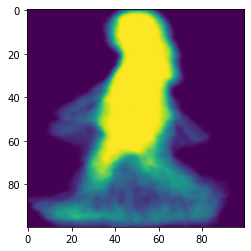

In [50]:
plt.imshow(img)

In [51]:
img.numpy().max() 
img

<tf.Tensor: shape=(100, 100, 1), dtype=float32, numpy=
array([[[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       ...,

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]], dtype=float32)>

In [52]:
#anc_1_im,neg_1_im
negatives = tf.data.Dataset.zip((anc_1_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
q=tf.data.Dataset.zip((anc_1_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=negatives.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_1_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)







#print(len(negatives))
print(len(data1))
print(type(data1))

180
<class 'tensorflow.python.data.ops.dataset_ops.ConcatenateDataset'>


In [53]:
#anc_2_im,neg_1_im
q = tf.data.Dataset.zip((anc_2_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

360


In [54]:
#anc_3_im,neg_1_im
q = tf.data.Dataset.zip((anc_3_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_2_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_3_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

540


In [55]:
#anc_4_im,neg_1_im
q=tf.data.Dataset.zip((anc_4_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_4_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

720


In [56]:
#anc_5_im,neg_1_im
q=tf.data.Dataset.zip((anc_5_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_5_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

900


In [57]:
#anc_6_im,neg_1_im
q=tf.data.Dataset.zip((anc_6_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_6_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

1080


In [58]:
#anc_7_im,neg_1_im
q=tf.data.Dataset.zip((anc_7_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_7_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

1260


In [59]:
#anc_8_im,neg_1_im
q=tf.data.Dataset.zip((anc_8_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_8_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

1440


In [60]:
#anc_9_im,neg_1_im
q=tf.data.Dataset.zip((anc_9_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_9_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

1620


In [61]:
#anc_11_im,neg_1_im
q=tf.data.Dataset.zip((anc_10_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_10_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)

print(len(data1))

1800


In [62]:
#anc_12_im,neg_1_im
q=tf.data.Dataset.zip((anc_12_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_12_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)


print(len(data1))

1980


In [63]:
#anc_13_im,neg_1_im
q=tf.data.Dataset.zip((anc_13_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_13_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)


print(len(data1))

2160


In [64]:
#anc_14_im,neg_1_im
q=tf.data.Dataset.zip((anc_14_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_14_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)


print(len(data1))

2340


In [65]:
#anc_15_im,neg_1_im
q=tf.data.Dataset.zip((anc_15_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_15_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)


print(len(data1))

2520


In [66]:
#anc_16_im,neg_1_im
q=tf.data.Dataset.zip((anc_16_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_16_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)


print(len(data1))

2700


In [67]:
#anc_17_im,neg_1_im
q=tf.data.Dataset.zip((anc_17_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_17_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)


print(len(data1))

2880


In [68]:
#anc_18_im,neg_1_im
q=tf.data.Dataset.zip((anc_18_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_18_im,neg_19_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)


print(len(data1))

3060


In [69]:
#anc_19_im,neg_1_im
q=tf.data.Dataset.zip((anc_19_im,neg_1_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_2_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_3_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_4_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_5_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_6_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_7_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_8_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_9_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_10_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_11_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_12_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_13_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_14_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_15_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_16_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_17_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)
q=tf.data.Dataset.zip((anc_19_im,neg_18_im,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg_1_im)))))
data1=data1.concatenate(q)


print(len(data1))

3240


In [70]:
print(len(data1))

3240


In [71]:

print(len(data1))

3240


In [72]:
#pos_1_0_im,anc_1_im
q = tf.data.Dataset.zip((anc_1_im,pos_1_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_1_im,pos_1_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

3410


In [73]:
#pos_2_0_im,anc_1_im
q = tf.data.Dataset.zip((anc_2_im,pos_2_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_2_im,pos_2_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

3580


In [74]:
#pos_3_0_im,anc_1_im
q = tf.data.Dataset.zip((anc_3_im,pos_3_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_3_im,pos_3_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

3750


In [75]:
#pos_4_0_im,anc_4_im
q = tf.data.Dataset.zip((anc_4_im,pos_4_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))
q = tf.data.Dataset.zip((anc_4_im,pos_4_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

3760
3770
3780
3790
3800
3810
3820
3830
3840
3850
3860
3870
3880
3890
3900
3910
3920


In [76]:
q = tf.data.Dataset.zip((anc_5_im,pos_5_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_5_im,pos_5_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

4090


In [77]:
q = tf.data.Dataset.zip((anc_6_im,pos_6_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_6_im,pos_6_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

4260


In [78]:
q = tf.data.Dataset.zip((anc_7_im,pos_7_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_7_im,pos_7_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

4430


In [79]:
#pos_8_0_im,anc_8_im
q = tf.data.Dataset.zip((anc_8_im,pos_8_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_8_im,pos_8_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

4600


In [80]:
#pos_9_0_im,anc_9_im
q = tf.data.Dataset.zip((anc_9_im,pos_9_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_9_im,pos_9_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

4770


In [81]:
#pos_10_0_im,anc_10_im
q = tf.data.Dataset.zip((anc_10_im,pos_10_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_10_im,pos_10_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

4940


In [82]:
#pos_11_0_im,anc_11_im
q = tf.data.Dataset.zip((anc_11_im,pos_11_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_11_im,pos_11_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

5110


In [83]:
#pos_12_0_im,anc_12_im
q = tf.data.Dataset.zip((anc_12_im,pos_12_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_12_im,pos_12_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

5280


In [84]:
#pos_13_0_im,anc_13_im
q = tf.data.Dataset.zip((anc_13_im,pos_13_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_13_im,pos_13_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

5450


In [85]:
#pos_14_0_im,anc_14_im
q = tf.data.Dataset.zip((anc_14_im,pos_14_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_14_im,pos_14_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

5620


In [86]:
#pos_15_0_im,anc_15_im
q = tf.data.Dataset.zip((anc_15_im,pos_15_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_15_im,pos_15_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

5790


In [87]:
#pos_16_0_im,anc_16_im
q = tf.data.Dataset.zip((anc_16_im,pos_16_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_16_im,pos_16_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

5960


In [88]:
#pos_17_0_im,anc_17_im
q = tf.data.Dataset.zip((anc_17_im,pos_17_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_17_im,pos_17_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

6130


In [89]:
#pos_18_0_im,anc_18_im
q = tf.data.Dataset.zip((anc_18_im,pos_18_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_18_im,pos_18_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

6300


In [90]:
#pos_19_0_im,anc_19_im
q = tf.data.Dataset.zip((anc_19_im,pos_19_0_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_1_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_2_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_3_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_4_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_5_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_6_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_7_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_8_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_9_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_10_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_11_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_12_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_13_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_14_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_15_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
q = tf.data.Dataset.zip((anc_19_im,pos_19_16_im,tf.data.Dataset.from_tensor_slices(tf.ones(len(neg_1_im)))))
data1=data1.concatenate(q)
print(len(data1))

6470


In [91]:
print(len(data1))

6470


In [92]:
samples=negatives.as_numpy_iterator()

In [93]:
samples.next()

(b'data\\anchor\\01\\00001_5.jpg', b'data\\negative\\02\\00002_10.jpg', 0.0)

In [94]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [95]:
example = samples.next()

In [96]:
res = preprocess_twin(*example)

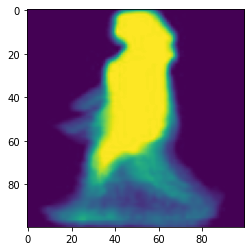

In [97]:
plt.imshow(res[1])

In [98]:
data1=data1.map(preprocess_twin)

In [101]:
data1=data1.cache()
data1 = data1.shuffle(buffer_size=7000)


In [104]:
train_data = data1.take(round(len(data1)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [106]:
test_data = data1.skip(round(len(data1)*.7))
test_data = test_data.take(round(len(data1)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [107]:
inp = Input(shape=(100,100,1), name='input_image')

In [108]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)
mod = Model(inputs=[inp], outputs=[d1], name='embedding')
mod.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 91, 91, 64)        6464      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0 

In [110]:
def make_embedding():
    inp = Input(shape=(100,100,1),name='input image')
    c1=Conv2D(64,(10,10),activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [111]:
embedding = make_embedding()
embedding.summary()

Model: "embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input image (InputLayer)     [(None, 100, 100, 1)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 91, 91, 64)        6464      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 40, 40, 128)       401536    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 128)       262272    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 128)         0 

In [112]:
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [113]:
 l1 = L1Dist()

In [114]:
l1

In [115]:
input_image = Input(name='input_img', shape=(100,100,1))
validation_image = Input(name='validation_img', shape=(100,100,1))

In [116]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [117]:
siamese_layer = L1Dist()

In [118]:
distances = siamese_layer(inp_embedding, val_embedding)
distances

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'l1_dist_1')>

In [119]:
classifier = Dense(1, activation='sigmoid')(distances)

In [120]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [121]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38947648    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
l1_dist_1 (L1Dist)              (None, 4096)         0           embedding[0][0]     

In [124]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,1))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,1))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [125]:
siamese_model = make_siamese_model()

In [126]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
validation_img (InputLayer)     [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
embedding (Functional)          (None, 4096)         38947648    input_img[0][0]                  
                                                                 validation_img[0][0]             
__________________________________________________________________________________________________
distance (L1Dist)               (None, 4096)         0           embedding[2][0]     

In [127]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [128]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [129]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [130]:
test_batch = train_data.as_numpy_iterator()

In [131]:
batch_1 = test_batch.next()

In [132]:
X = batch_1[:2]
y = batch_1[2]

In [133]:
y

array([1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.],
      dtype=float32)

In [134]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    # Return loss
    return loss

In [135]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            train_step(batch)
            progbar.update(idx+1)
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [137]:
EPOCHS = 10

In [138]:
train(train_data, EPOCHS)


 Epoch 1/10
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
284/284 [==============================] - 496s 2s/step

 Epoch 2/10
284/284 [==============================] - 450s 2s/step

 Epoch 3/10
284/284 [==============================] - 457s 2s/step

 Epoch 4/10
284/284 [==============================] - 451s 2s/step

 Epoch 5/10
284/284 [==============================] - 445s 2s/step

 Epoch 6/10
284/284 [==============================] - 436s 2s/step

 Epoch 7/10
284/284 [==============================] - 488s 2s/step

 Epoch 8/10
284/284 [==============================] - 471s 2s/step

 Epoch 9/10
284/284 [==============================] - 449s 2s/step

 Epoch 10/10
284/284 [==============================] - 432s 2s/step


In [139]:
from tensorflow.keras.metrics import Precision, Recall

In [140]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [141]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

array([[2.1343684e-23],
       [5.9704050e-02],
       [5.3711108e-10],
       [9.9999905e-01],
       [7.7168589e-15],
       [1.6068977e-04],
       [4.9384914e-07],
       [1.0564483e-03],
       [2.7774360e-19],
       [9.4573033e-07],
       [2.7694497e-02],
       [9.8023021e-01],
       [1.1373905e-01],
       [9.9999976e-01],
       [1.4696512e-15],
       [3.6230627e-29]], dtype=float32)

In [142]:
y_true

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
      dtype=float32)

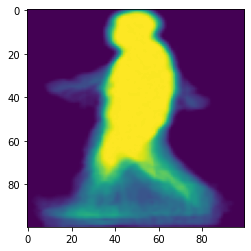

In [144]:
plt.imshow(test_input[0])


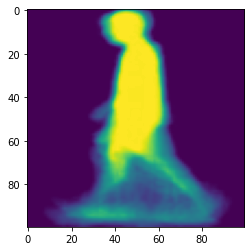

In [145]:
plt.imshow(test_val[0])

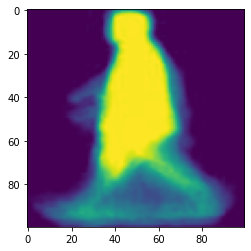

In [149]:
plt.imshow(test_val[3])

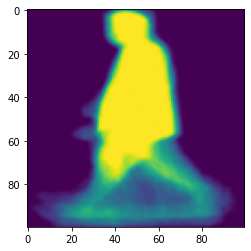

In [148]:
plt.imshow(test_input[3])

In [152]:
m = Recall()
y_hat = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [153]:
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [157]:
siamese_model.compile(optimizer='adam', loss='binary_crossentropy')
siamese_model.save('siamesemodel.h5')

In [155]:
L1Dist

__main__.L1Dist

In [158]:
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [159]:
model.predict([test_input, test_val])

array([[2.1343684e-23],
       [5.9704050e-02],
       [5.3711108e-10],
       [9.9999905e-01],
       [7.7168589e-15],
       [1.6068977e-04],
       [4.9384914e-07],
       [1.0564483e-03],
       [2.7774360e-19],
       [9.4573033e-07],
       [2.7694497e-02],
       [9.8023021e-01],
       [1.1373905e-01],
       [9.9999976e-01],
       [1.4696512e-15],
       [3.6230627e-29]], dtype=float32)